---
---

# <center><font color='black'>Bayesian Inference</font></center> <a class="tocSkip">
    
### <center><font color='black'>Nicolai Haug</font></center> <a class="tocSkip">
    
### <center><font color='black'>2021</font></center> <a class="tocSkip">
    
---
---

# Table of Contents <a class="tocSkip">

* [Introduction](#introduction)
    * [Configure Notebook](#configure) 
* [The Bayesian Paradigm](#bayesparadigm)
    * [Notation](#notation)
    * [Bayesian Inference](#bayesinfer)
        * [Bayesian Terminology](#terminology)
        * [The Unnormalized Posterior](#unnormalized)
* [Parameter Inference](#parameter)
    * [Single Parameter Models](#single)
    * [Multiparameter Models](#multi)
* [The Influence of the Prior and How to Choose One](#prior)
    * [Conjugate Prior Distributions](#conjugate)
* [Uncertainty Analysis in the Bayesian Paradigm](#uncertainty)      
* [References](#references)

# Introduction <a name="introduction"></a>

The objective of the master project is to identify the parametrization of mechanistic models in neuroscience that achieves an agreement with experimental data. Bayesian inference provides a robust approach to parameter identification with quantified uncertainty. The ability to quantify uncertainty is perhaps the most important feature of Bayesian inference, and one could argue that it is essential to not only provide a good model but also an uncertainty estimate of the conclusions. 

In this notebook we take a look at the fundamentals behind Bayesian inference. 


<img src="figures/frequentists_vs_bayesians.png" width="350" height="350" align="center" /> 

>**Image:** A day in life with Frequentists and Bayesians. (Image source: [xkcd](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)) 

## Configure Notebook <a name="configure"></a>

<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-exclamation-circle" aria-hidden="true"></i>&nbsp; Important</b><br>
    <p style="color: black">
        Run the cell below to configure the notebook. 
    </p>
<div>
</div>
</div>

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from IPython.display import display
from latex_envs.latex_envs import figcaption 
from matplotlib import cm
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter, LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import default_rng

import warnings
# Comment this to turn on warnings
warnings.filterwarnings('ignore')

#plt.style.use('seaborn')
sns.set()
sns.set_context("paper")
sns.set_style("darkgrid", {"axes.facecolor": "0.96"})

# Set fontsizes in figures
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'legend.fontsize': 'large',
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.rc('text', usetex=True)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

# The Bayesian Paradigm <a name="bayesparadigm"></a>

## Notation <a name="notation"></a>

At the outset, a few comments on notation: First, $p(\cdot \mid \cdot)$ denotes a **conditional probability density** and $p(\cdot)$ denotes a **marginal distribution**. The conditional probability $p(A \mid B)$ is the likelihood of event $A$ occurring given that $B$ is true, and the marginal probability $p(A)$ is the probability of observing $A$. The terms **distribution** and **density** are used interchangeably. For brevity, the term **probability density** will often be condensed into the term **density**. A **probability mass function**, that gives the probability that a discrete random variable is exactly equal to some value, is abbreviated **pmf**. Similarly, a **probability density function**, associated with continuous rather than discrete random variables, is abbreviated **pdf**. The same notation is used for continuous density functions and discrete probability mass functions. Furthermore, we refer to both pdf and pmf as pdf, when the nomenclature makes no difference. 

Direkte fra BDA: 


As general notation, we let $\theta$ denote unobservable vector quantities or population **parameters** of interest, $y$ denote the observed data, and $\title{y}$ denote unknown, but potentially observable, quantities. In general these symbols represent multivariate quantities. When using matrix notation, we consider vectors as column vectors throughout; for example, if $u$ is a vector with $n$ components, then $u^T u$ is a scalar and $uu^T$ an $n\times n$ matrix.

In Bayesian inference we encounter conditional densities called **posterior** and **likelihood**. In order to make the distinction clear, we will denote the former by $\pi(\cdot \mid \cdot)$ and the latter by $p(\cdot \mid \cdot)$. We also encounter a marginal density called **prior**, which we will denote by $\pi(\cdot)$.

## Bayesian Inference <a name="bayesinfer"></a>

In statistical inference, there are, broadly speaking, two paradigms for the analysis of sampled data: **frequentist inference** and **Bayesian inference**. They often differ with each other in their fundamental interpretation of probability. In terms of parameter inference, the standard frequentist view is to regard the value of some parameter $\theta$ as fixed but unknown, and draw appropriate conclusions from sample data $y$ by emphasizing the relative frequency of the data. The Bayesian approach to inference is to regard $\theta$ as a random variable having a **prior probability distribution**, usually a prior pdf $\pi(\theta)$ since there will typically be a continuum of possible values of a parameter rather than just a discrete set, that incorporates all available information about it [[1, p. 758, 776]](#references). In the case of substantial prior knowledge about a parameter $\theta$, the prior pdf is narrow and concentrated about some central value, whereas a lack of information yield a wider and relatively flat prior pdf as shown in the figure below.

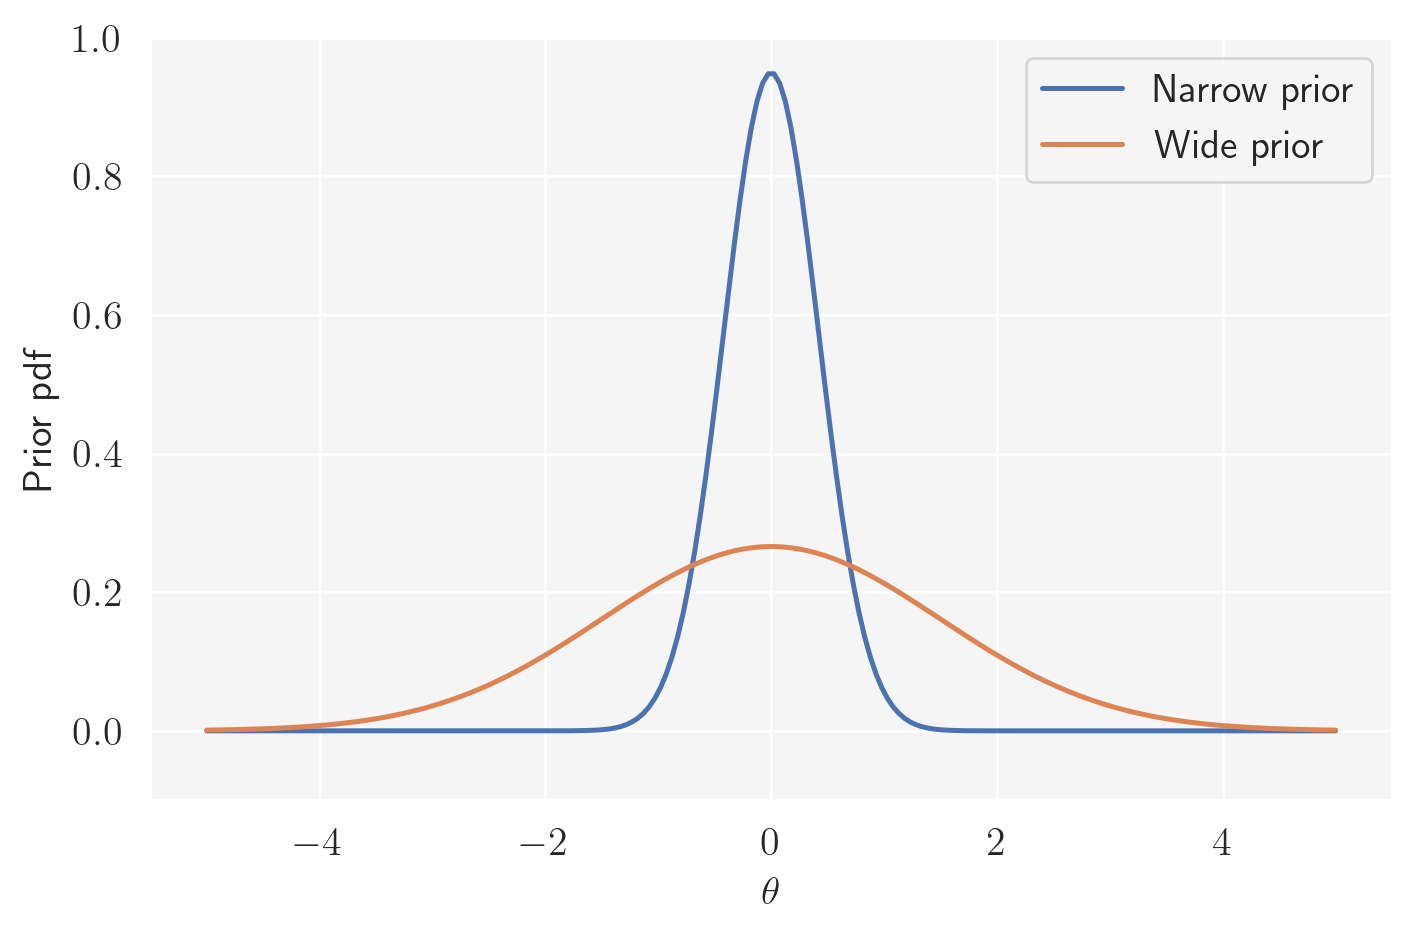

In [2]:
fig = plt.figure(figsize=(6, 4), tight_layout=True, dpi=120)
x = np.linspace(-5, 5, 200)
y_narrow = stats.norm(0, 0.42).pdf(x)
y_wide = stats.norm(0, 1.5).pdf(x)

plt.plot(x, y_narrow, lw=1.5, label='Narrow prior')
plt.plot(x, y_wide, lw=1.5, label='Wide prior')
plt.ylabel(r"Density")
plt.xlabel(r"$\theta$")
plt.ylim(-0.1, 1)
plt.legend()
plt.show()
figcaption("A narrow concentrated prior about some central value and a wider less informative prior.")

In order to make probability statements about $\theta$ given sample data $y$, a probabilistic model representing the joint probability distribution for $\theta$ and $y$ must be provided [[2, p. 6]](#references). The joint pmf or pdf can be written as a product of the **prior distribution** $p(\theta)$ and the conditional **sampling distribution** $p(y \mid \theta)$:

<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-pencil" aria-hidden="true"></i>&nbsp; Joint Probability Model</b><br>
<div>

\begin{equation}
    p(\theta, y) = p(y \mid \theta) \pi(\theta) \tag{1}
\end{equation}

</div>
</div>

At this point, Bayes' theorem is used to produce the **posterior** distribution of $\theta$ given the data $y$ [[1, p. 758, 776]](#references). A common incarnation of Bayes' theorem is: 

<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-pencil" aria-hidden="true"></i>&nbsp; Bayes' Theorem</b><br>
<div>

\begin{equation}
    \pi \left( \theta | y\right) = \frac{p(\theta, y)}{p(y)}  = \frac{p \left(y | \theta \right) \pi \left(\theta \right)}{p(y)} \tag{2}
\end{equation}

</div>
</div>

### Bayesian Terminology <a name="terminology"></a>

As may be evident from above, the various terms in Bayes' theorem have formal names. For clarity, these terms will now be discussed in further detail. 

The quantity $\pi(\theta)$ is called the **prior** (probability) distribution and represents beliefs about $\theta$ before the data $y$ is analyzed. It is often specified by a particular distribution among a set of well-known and tractable distributions, with the purpose of making evaluation of prior probabilities and random generation of $\theta$ values straightforward [[3]](#references). 

Our prior state of knowledge is modified by data $y$, obtained by performing experiments, through the **likelihood** function $p (y \mid \theta)$, and yields the **posterior** distribution $\pi (\theta \mid y)$, representing our state of knowledge about $\theta$ in the light of $y$ [[4, p. 6]](#references). The mean of this posterior distribution gives a point estimate of $\theta$. 

An interval having a posterior probability $.95$ gives a $95\%$ **credibility** interval, an interval within which an unobserved parameter value falls with a particular probability, the Bayesian analogue of a $95\%$ confidence interval [[1, p. 777]](#references).

The quantity $p(y)$ is called the **evidence** (sometimes also termed the marginal likelihood or the prior predictive probability of the data), and is the distribution of the observed data marginalized over the parameter [[3]](#references). In the case of continuous $\theta$ the evidence is given by $p(y) = \int p(y \mid \theta) \pi(\theta) \mathrm{d}\theta$, and in the case of discrete set of parameters by $p(y) = \sum_\theta p(y\mid \theta) \pi(\theta)$, where the sum is over all possible values of $\theta$ [[2, p. 7]](#references).  

### The Unnormalized Posterior <a name="unnormalized"></a>

The evidence is the same for all possible $\theta$, as it does not depend on $\theta$, meaning that, with fixed $y,$ this factor can be omitted in parameter identification since it constitutes a normalizing constant and does not enter into determining the relative posterior probabilities of different values of $\theta$ [[3]](#references) . Omitting the evidence yield the unnormalized posterior distribution:

<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-pencil" aria-hidden="true"></i>&nbsp; Unnormalized Posterior Distribution</b><br>
<div>

\begin{equation}
    \pi (\theta \mid y) \propto p(\theta, y) =  p (y \mid \theta) \pi (\theta) \tag{3}
\end{equation}

</div>
</div>

The second term in this expression, $p (y \mid \theta)$, is taken here as a function of $\theta$, not of $y$.  

The core of Bayesian inference is encapsulated in <font color=blue>Equation (2)</font> and <font color=blue>Equation (3)</font>. The principal task is to develop the joint probability model $p(\theta, y)$ and perform the computations to summarize the posterior $\pi(\theta \mid y)$.

# Parameter Inference <a name="parameter"></a>

The idea of parameter inference is to combine observed data $\mathcal{D}$ and a model $\mathcal{M}$. Such a model comprises parameters, and some of these parameters, denoted $\theta \in \mathbb{R}^{n_\theta}$, may be unknown – either because they are not measured or it is impossible to measure them. 

Frequentist approach: MLE - mention briefly

https://towardsdatascience.com/parameter-inference-maximum-likelihood-2382ef895408

## Single Parameter Inference <a name="single"></a>

## Multiparameter Inference <a name="multi"></a>

# Bayes Estimators 

https://en.wikipedia.org/wiki/Bayes_estimator#Posterior_mean

https://en.wikipedia.org/wiki/Point_estimation

# The Influence of the Prior and How to Choose One <a name="prior"></a>

* flat 
* uninformative 
* diffuse 
* The Jeffreys’ Prior: Suppose we cannot easily find the natural scale on which the likelihood is in data-translated format, or that such a decomposition does not exist. Jeffreys (1961) proposed a general prior in such cases, based on the Fisher information I of the likelihood. 
* When a prior distribution is not integrable it is said to be **improper**

## Conjugate Prior Distributions <a name="conjugate"></a>

Conjugacy is formally defined as follows \cite{abc_handbook}. If $\mathcal{F}$ is a class of sampling distributions $p \left(y | \theta \right)$, and $\mathcal{P}$ is a class of prior distributions for $\theta$, then the class $\mathcal{P}$ is *conjugate* for $\mathcal{F}$ if

\begin{equation}
    \pi \left(\theta | y \right) \in \mathcal{P} \, \forall p \left(\cdot | \theta \right) \in \mathcal{F} \land \pi (\cdot) \in \mathcal{P}
\end{equation}

This definition is formally vague since if we choose $\mathcal{P}$ as the class of all distributions, then $\mathcal{P}$ is always conjugate no matter what class of sampling distributions is used. We are most interested in *natural* conjugate prior families, which arise by taking $\mathcal{P}$ to be the set of all densities having the same functional form as the likelihood \cite[p. 36]{abc_handbook}.

A conjugate prior of a likelihood is a prior that, when used in combination with a given likelihood, returns a posterior with the same functional form as the prior. cite BAP

# Prior and Posterior Predictive Checks

https://docs.pymc.io/notebooks/posterior_predictive.html

https://avehtari.github.io/masterclass/slides_ppc.pdf

https://vasishth.github.io/bayescogsci/book/sec-priorpred.html

https://betanalpha.github.io/assets/case_studies/principled_bayesian_workflow.html#113_Prior_Predictive_Checks

http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2018/tutorials/t6a_model_generation_and_prior_predictive_checks.html python

# Uncertainty Analysis in the Bayesian Paradigm <a name="uncertainty"></a>

# References <a name="references"></a>

[1] Devore, J. L., & Berk, K. N. (2011). *Modern mathematical statistics with applications*. Belmont, CA: Thomson Brooks/Cole.

[2] Gelman, A., Carlin, J.B., Stern, H.S., Dunson, D.B., Vehtari, A., & Rubin, D.B. (2014). *Bayesian Data Analysis*. 3rd. Chapman and Hall/CRC. https://doi.org/10.1201/b16018

[3] Mikael Sunnåker et al. “Approximate Bayesian Computation”. eng. In: 9.1 (2013), e1002803. issn: 1553-734X 

[4] D. S. Sivia and J. Skilling. (2006) *Data Analysis - A Bayesian Tutorial*. 2nd. Oxford Science Publications. Oxford University Press